1. Stáhněte si data winequality-red.csv pomocí odkazu: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 
2. Prozkoumejte rozložení atributů pomocí histogramů (v jednom souboru png by histogramy měly být v různých oknech. Počet řádků a sloupců určete sami), grafů hustoty a boxplotů. Formátujte diagramy odpovídajícím způsobem. Grafy hustoty a boxploty by měly být prezentovány v samostatných souborech v jednom okně.
3. Normalizujte atributy. Opakujte bod 2 pro normalizovaná data (škalování).
4. Vytvořte hybridní model klastrování dat (klastrování řádků kromě cílového sloupce) na základě komplexního použití Bayesovského algoritmu optimalizace a algoritmu aglomerativního klastrování. Jako funkci optimalizace použijte kritérium Chalinsky-Harabasz. Vizualizujte výsledky klastrování.
5. Vytvořte hybridní model klasifikace dat na základě komplexního použití Bayesovského algoritmu optimalizace a algoritmu náhodného lesa (Random Forest). Při trénování modelu použijte 5-Fold cross-validation. Jako funkci optimalizace použijte přesnost klasifikace (Accuracy). Představte výsledky klasifikace na testovacích datech. 

Zadání je možná vyplnit v libovolném softwarovém prostředí (Python nebo R). Pří osobním jednání ukážete a vysvětlíte všechno co jste udělaly. 


In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


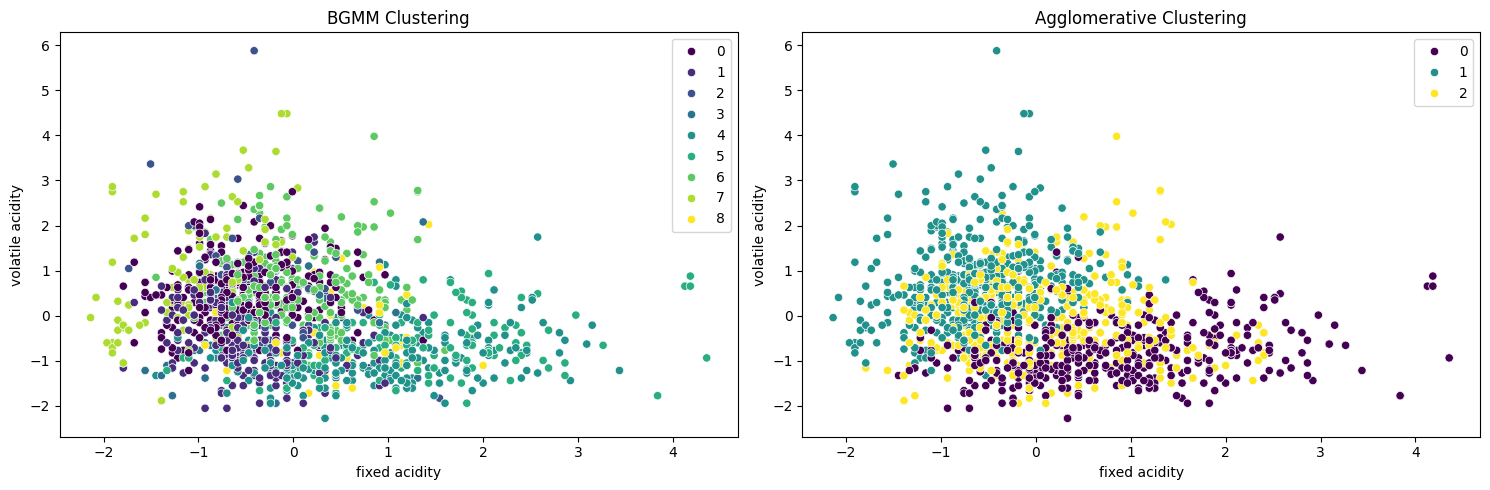

In [88]:
file = pd.read_csv('winequality-red.csv')

# Nastavení barev pro vizualizaci
barvy = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange',
    7: 'pink',
    8: 'brown',
    9: 'cyan',
    10: 'magenta',
    11: 'lime',
    12: 'black'
}

# Vytvoření histogramů pro všechny sloupce
plt.figure(figsize=(15, 10))
for i, col in enumerate(file.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=file[col], bins=8, color=barvy[i + 1], linewidth=5, edgecolor="white")
    plt.title(f'Histogram {col}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.close()

# Vytvoření boxplotů pro všechny sloupce
plt.figure(figsize=(15, 10))
for i, col in enumerate(file.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=file[col], color=barvy[i + 1], width=0.5, linewidth=2, boxprops=dict(alpha=0.6))
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.close()

# Vytvoření violinplotů pro všechny sloupce
plt.figure(figsize=(15, 10))
for i, col in enumerate(file.columns):
    plt.subplot(3, 4, i + 1)
    sns.violinplot(data=file[col], color=barvy[i + 1], width=0.5, linewidth=4)
    plt.title(f'Violinplot {col}')
plt.tight_layout()
plt.savefig('violinplots.png')
plt.close()

# Normalizace dat
scaler = StandardScaler()
normalized_data = scaler.fit_transform(file)
normalized_df = pd.DataFrame(normalized_data, columns=file.columns)

# Vytvoření histogramů pro normalizovaná data
plt.figure(figsize=(15, 10))
for i, col in enumerate(normalized_df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=normalized_df[col], bins=8, color=barvy[i + 1], linewidth=5, edgecolor="white")
    plt.title(f'Histogram (Normalized) - {col}')
plt.tight_layout()
plt.savefig('histograms_normalized.png')
plt.close()

# Vytvoření boxplotů pro normalizovaná data
plt.figure(figsize=(15, 10))
for i, col in enumerate(normalized_df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=normalized_df[col], color=barvy[i + 1], width=0.5, linewidth=2, boxprops=dict(alpha=0.6))
    plt.title(f'Boxplot (Normalized) - {col}')
plt.tight_layout()
plt.savefig('boxplots_normalized.png')
plt.close()

# Vytvoření violinplotů pro normalizovaná data
plt.figure(figsize=(15, 10))
for i, col in enumerate(normalized_df.columns):
    plt.subplot(3, 4, i + 1)
    sns.violinplot(data=normalized_df[col], color=barvy[i + 1], width=0.5, linewidth=4)
    plt.title(f'Violinplot (Normalized) - {col}')
plt.tight_layout()
plt.savefig('violinplots_normalized.png')
plt.close()

# Funkce pro Bayesovský algoritmus optimalizace
def bayesian_optimization_clustering(data, n_components_range):
    best_score = -np.inf
    optimal_params = None
    cluster_assignments = None
    
    for n_components in n_components_range:
        bgmm = BayesianGaussianMixture(n_components=n_components, random_state=42)
        bgmm.fit(data)
        score = calinski_harabasz_score(data, bgmm.predict(data))
        
        if score > best_score:
            best_score = score
            optimal_params = {'n_components': n_components}
            cluster_assignments = bgmm.predict(data)
    
    return optimal_params, cluster_assignments

# Funkce pro aglomerativní klastrování
def agglomerative_clustering(data, n_clusters):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_assignments = clustering_model.fit_predict(data)
    return cluster_assignments

# Klastrování pro všechny sloupce (bez cílového sloupce)
X = normalized_df.drop('quality', axis=1)

# Bayesian Gaussian Mixture Model (BGMM)
n_components_range = range(2, 10)
bgmm = BayesianGaussianMixture(n_components=max(n_components_range), random_state=42)
bgmm.fit(X)
bgmm_clusters = bgmm.predict(X)

# Aglomerativní klastrování
n_clusters_agglomerative = 3
agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters_agglomerative)
agglomerative_clusters = agglomerative_model.fit_predict(X)

# Vizualizace výsledků
plt.figure(figsize=(15, 5))

# BGMM
plt.subplot(1, 2, 1)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm_clusters, palette='viridis', legend='full')
plt.title('BGMM Clustering')

# Aglomerativní klastrování
plt.subplot(1, 2, 2)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=agglomerative_clusters, palette='viridis', legend='full')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

In [90]:
file = pd.read_csv('winequality-red.csv')

# Příprava dat pro klasifikaci
X = file.drop('quality', axis=1)
y = file['quality']

# Rozdělení dat na trénovací a testovací množiny
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializace klasifikačního modelu (např. Random Forest)
rf_classifier = RandomForestClassifier(random_state=42)

# Trénování modelu s 5-Fold cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Průměrná přesnost na trénovacích datech
average_accuracy = cross_val_scores.mean()

# Trénování finálního modelu na celém trénovacím datasetu
rf_classifier.fit(X_train, y_train)

# Predikce na testovacím datasetu
y_pred = rf_classifier.predict(X_test)

# Vyhodnocení výsledků
accuracy_test = accuracy_score(y_test, y_pred)
classification_report_test = classification_report(y_test, y_pred)

# Představení výsledků
print(f"Průměrná přesnost na trénovacích datech (cross-validation): {average_accuracy:.2f}")
print(f"Přesnost na testovacích datech: {accuracy_test:.2f}")
print("Classification Report na testovacích datech:")
print(classification_report_test)

Průměrná přesnost na trénovacích datech (cross-validation): 0.68
Přesnost na testovacích datech: 0.66
Classification Report na testovacích datech:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471